In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats 
import seaborn as sns

In [36]:
df = pd.read_csv("")

In [37]:
df.isnull().sum()

Unnamed: 0    0
cgpa          0
iq            0
placement     0
dtype: int64

In [5]:
x = df.drop(['selling_price'],axis=1)
y = df['selling_price']

In [6]:
x['brand'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [7]:
x['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [8]:
x['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [9]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3)

C:\Users\patel\AppData\Local\Temp\ipykernel_20540\1493462852.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['km_driven'])
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


((array([-3.66882798, -3.43550323, -3.30700637, ...,  3.30700637,
          3.43550323,  3.66882798]),
  array([      1,    1000,    1000, ...,  500000,  500000, 2360457],
        dtype=int64)),
 (47316.83355816465, 70403.77482861663, 0.8274642754031194))

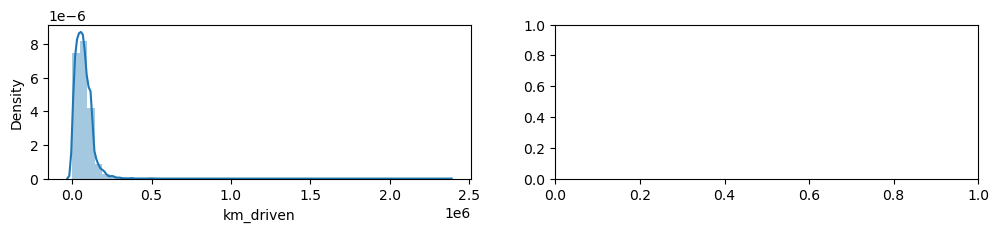

In [10]:
plt.figure(figsize=(12,2))
plt.subplot(121)
sns.distplot(x_train['km_driven'])

plt.subplot(122)
stats.probplot(x_train['km_driven'])

In [11]:
from sklearn.preprocessing import FunctionTransformer , OneHotEncoder , OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer

In [12]:
trf1 = ColumnTransformer(transformers = [
    ('brand',OneHotEncoder(drop='first'),['brand']),
    ('km_driven',FunctionTransformer(np.log1p),['km_driven']),
    ('fuel',OneHotEncoder(drop='first'),['fuel']),
    ('owner',OrdinalEncoder(categories=[['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car']]),['owner']),
])

In [13]:
x_train_trans = trf1.fit_transform(x_train)

In [14]:
x_test_trans = trf1.fit_transform(x_test)

In [15]:
lr = LinearRegression()
lr.fit(x_train_trans,y_train)

LinearRegression()

In [16]:
y_pred = lr.predict(x_test_trans)

In [32]:
from sklearn.metrics import r2_score , mean_squared_error

In [33]:
r2_score(y_test,y_pred)

-3.51863517062875

In [34]:
np.sqrt(mean_squared_error(y_test,y_pred))

1718985.7333039057